In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# import missingno as msno 
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("../data/features/train.csv", index_col=0)
test = pd.read_csv("../data/features/test.csv", index_col=0)

### 1) 데이터 살펴보기 
- 연속적인 시계열을 가지고 있는지 
- 결측값이 존재하는 지 (target, 그 외 columns들)
- 이상치가 존재하는 지 

In [4]:
print(f"train: {train.shape}", f"test: {test.shape}")

train: (2018352, 57) test: (12480, 57)


In [5]:
train.columns # target

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id', 'date',
       'year', 'quarter', 'month', 'week', 'hour', 'day_of_year',
       'day_of_month', 'day_of_week', 'eic_count_client',
       'installed_capacity_client', 'date_client', 'temperature_h_mean',
       'dewpoint_h_mean', 'rain_h_mean', 'snowfall_h_mean',
       'surface_pressure_h_mean', 'cloudcover_total_h_mean',
       'cloudcover_low_h_mean', 'cloudcover_mid_h_mean',
       'cloudcover_high_h_mean', 'windspeed_10m_h_mean',
       'winddirection_10m_h_mean', 'shortwave_radiation_h_mean',
       'direct_solar_radiation_h_mean', 'diffuse_radiation_h_mean', 'hour_h',
       'hours_ahead_f_mean', 'temperature_f_mean', 'dewpoint_f_mean',
       'cloudcover_high_f_mean', 'cloudcover_low_f_mean',
       'cloudcover_mid_f_mean', 'cloudcover_total_f_mean',
       '10_metre_u_wind_component_f_mean', '10_metre_v_wind_component_f_mean',
       

In [6]:
test.columns # currently_scored

Index(['county', 'is_business', 'product_type', 'is_consumption', 'datetime',
       'data_block_id', 'row_id', 'prediction_unit_id', 'currently_scored',
       'date', 'year', 'quarter', 'month', 'week', 'hour', 'day_of_year',
       'day_of_month', 'day_of_week', 'eic_count_client',
       'installed_capacity_client', 'date_client', 'temperature_h_mean',
       'dewpoint_h_mean', 'rain_h_mean', 'snowfall_h_mean',
       'surface_pressure_h_mean', 'cloudcover_total_h_mean',
       'cloudcover_low_h_mean', 'cloudcover_mid_h_mean',
       'cloudcover_high_h_mean', 'windspeed_10m_h_mean',
       'winddirection_10m_h_mean', 'shortwave_radiation_h_mean',
       'direct_solar_radiation_h_mean', 'diffuse_radiation_h_mean', 'hour_h',
       'hours_ahead_f_mean', 'temperature_f_mean', 'dewpoint_f_mean',
       'cloudcover_high_f_mean', 'cloudcover_low_f_mean',
       'cloudcover_mid_f_mean', 'cloudcover_total_f_mean',
       '10_metre_u_wind_component_f_mean', '10_metre_v_wind_component_f_mean

#### 연속적인 시계열을 이루고 있는지?
- 일부 세그먼트는 "2021-09-01"에서 시작하지 않아서 더 짧은 시계열을 가지고 있고, 중간이 빈 연속적이지 않은 시계열을 가지고 있다. 

In [8]:
# Calculate the size of each group
group_sizes = test.groupby("prediction_unit_id").size()
group_sizes[group_sizes < 192]

Series([], dtype: int64)

In [10]:
train.groupby(["prediction_unit_id", "is_consumption"]).count()

county  is_business  product_type  target  \
prediction_unit_id is_consumption                                              
0                  0                15312        15312         15312   15308   
                   1                15312        15312         15312   15308   
1                  0                15312        15312         15312   15308   
                   1                15312        15312         15312   15308   
2                  0                15312        15312         15312   15308   
...                                   ...          ...           ...     ...   
66                 1                12384        12384         12384   12381   
67                 0                11640        11640         11640   11637   
                   1                11640        11640         11640   11637   
68                 0                 1656         1656          1656    1656   
                   1                 1656         1656          1656    1656   

                                   datetime  data_block_id  row_id   date  \
prediction_unit_id is_consumption                                           
0                  0                  15312          15312   15312  15312   
                   1                  15312          15312   15312  15312   
1                  0                  15312          15312   15312  15312   
                   1                  15312          15312   15312  15312   
2                  0                  15312          15312   15312  15312   
...                                     ...            ...     ...    ...   
66                 1                  12384          12384   12384  12384   
67                 0                  11640          11640   11640  11640   
                   1                  11640          11640   11640  11640   
68                 0                   1656           1656    1656   1656   
                   1                   1656           1656    1656   1656   

                                    year  quarter  ...  snowfall_f_mean  \
prediction_unit_id is_consumption                  ...                    
0                  0               15312    15312  ...            15286   
                   1               15312    15312  ...            15286   
1                  0               15312    15312  ...            15286   
                   1               15312    15312  ...            15286   
2                  0               15312    15312  ...            15286   
...                                  ...      ...  ...              ...   
66                 1               12384    12384  ...            12382   
67                 0               11640    11640  ...            11638   
                   1               11640    11640  ...            11638   
68                 0                1656     1656  ...             1656   
                   1                1656     1656  ...             1656   

                                   total_precipitation_f_mean  \
prediction_unit_id is_consumption                               
0                  0                                    15286   
                   1                                    15286   
1                  0                                    15286   
                   1                                    15286   
2                  0                                    15286   
...                                                       ...   
66                 1                                    12382   
67                 0                                    11638   
                   1                                    11638   
68                 0                                     1656   
                   1                                     1656   

                                   forecast_date_electricity  \
prediction_unit_id is_consumption                              
0                  0                      

In [100]:
def split_target(data:pd.DataFrame):
    """
    target과 is_consumption을 이용해서 consumption, production을 각각 만들고, 행을 하나로 합치기
    """
    data = data.copy() 

    data["consumption"] = np.where(data["is_consumption"]== 1, data["target"], np.NaN)
    data["production"] = np.where(data["is_consumption"]== 0, data["target"], np.NaN)

    prod_data = data[data["is_consumption"]==0]
    cons_data = data[data["is_consumption"]==1]

    # "datetime" 열을 datetime 형식으로 변환
    prod_data.loc[:, "datetime"] = pd.to_datetime(prod_data["datetime"])
    cons_data.loc[:, "datetime"] = pd.to_datetime(cons_data["datetime"])

    # "datetime" 열을 인덱스로 설정
    prod_data.set_index("datetime", inplace=True)
    cons_data.set_index("datetime", inplace=True)

    # 두 데이터프레임의 인덱스를 맞춘 후 할당
    prod_data.loc[:, "consumption"] = cons_data["consumption"].values  # Use .loc to avoid SettingWithCopyWarning

    data = prod_data
    data.drop(columns=["target", "is_consumption"], inplace=True) 
    
    return data

In [101]:
train_splited = split_target(train)
train_splited.groupby("prediction_unit_id").count()

,county,is_business,product_type,data_block_id,row_id,date,year,quarter,month,week,...,forecast_date_electricity,euros_per_mwh_electricity,origin_date_electricity,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,origin_date_gas,mean_price_per_mwh_gas,consumption,production
prediction_unit_id,,,,,,,,,,,,,,,,,,,,,
0,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312,...,15286,15286,15286,15288,15288,15288,15288,15288,15308,15308
1,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312,...,15286,15286,15286,15288,15288,15288,15288,15288,15308,15308
2,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312,...,15286,15286,15286,15288,15288,15288,15288,15288,15308,15308
3,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312,...,15286,15286,15286,15288,15288,15288,15288,15288,15308,15308
4,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312,...,15286,15286,15286,15288,15288,15288,15288,15288,15308,15308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,13128,13128,13128,13128,13128,13128,13128,13128,13128,13128,...,13126,13126,13126,13128,13128,13128,13128,13128,13125,13125
65,12384,12384,12384,12384,12384,12384,12384,12384,12384,12384,...,12382,12382,12382,12384,12384,12384,12384,12384,12381,12381
66,12384,12384,12384,12384,12384,12384,12384,12384,12384,12384,...,12382,12382,12382,12384,12384,12384,12384,12384,12381,12381


#### 시계열이 유독 짧은 세그먼트 확인하기
- 세그먼트 [21, 26, 41, 44, 47, 61, 62, 63, 64, 65, 66, 67, 68] 가 시계열이 유독 짧다.
- 앞, 뒤 기간이 통으로 없다. 

In [105]:
# Calculate the size of each group
group_sizes = train_splited.groupby("prediction_unit_id").size()
segs_shorter_dt = group_sizes[group_sizes < 15312].index
group_sizes[group_sizes < 15312]


prediction_unit_id
21    14568
26     9984
41     6072
44    14112
47    12000
61    14592
62    14592
63    14592
64    13128
65    12384
66    12384
67    11640
68     1656
dtype: int64

In [106]:
train_segs_shorter = train_splited[train_splited["prediction_unit_id"].isin(segs_shorter_dt)]
train_segs_shorter.groupby("prediction_unit_id").count()

,county,is_business,product_type,data_block_id,row_id,date,year,quarter,month,week,...,forecast_date_electricity,euros_per_mwh_electricity,origin_date_electricity,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,origin_date_gas,mean_price_per_mwh_gas,consumption,production
prediction_unit_id,,,,,,,,,,,,,,,,,,,,,
21,14568,14568,14568,14568,14568,14568,14568,14568,14568,14568,...,14542,14542,14542,14544,14544,14544,14544,14544,14564,14564
26,9984,9984,9984,9984,9984,9984,9984,9984,9984,9984,...,9959,9959,9959,9960,9960,9960,9960,9960,9981,9981
41,6072,6072,6072,6072,6072,6072,6072,6072,6072,6072,...,6047,6047,6047,6048,6048,6048,6048,6048,6070,6070
44,14112,14112,14112,14112,14112,14112,14112,14112,14112,14112,...,14086,14086,14086,14088,14088,14088,14088,14088,14108,14108
47,12000,12000,12000,12000,12000,12000,12000,12000,12000,12000,...,11975,11975,11975,11976,11976,11976,11976,11976,11997,11997
61,14592,14592,14592,14592,14592,14592,14592,14592,14592,14592,...,14590,14590,14590,14592,14592,14592,14592,14592,14588,14588
62,14592,14592,14592,14592,14592,14592,14592,14592,14592,14592,...,14590,14590,14590,14592,14592,14592,14592,14592,14588,14588
63,14592,14592,14592,14592,14592,14592,14592,14592,14592,14592,...,14590,14590,14590,14592,14592,14592,14592,14592,14588,14588
64,13128,13128,13128,13128,13128,13128,13128,13128,13128,13128,...,13126,13126,13126,13128,13128,13128,13128,13128,13125,13125


In [114]:
train_segs_shorter = train_segs_shorter.reset_index()

In [132]:
segs_shorter_ids = [21, 26, 41, 44, 47, 61, 62, 63, 64, 65, 66, 67, 68]
for seg in segs_shorter_ids:
    seg_trn = train_segs_shorter[train_segs_shorter["prediction_unit_id"]==seg]
    print(f"segment {seg}", pd.date_range(start = "2021-09-01", end = "2023-05-31 23:00:00", freq="1H").difference(seg_trn["datetime"]))


segment 21 DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-31 14:00:00', '2022-01-31 15:00:00',
               '2022-01-31 16:00:00', '2022-01-31 17:00:00',
               '2022-01-31 18:00:00', '2022-01-31 19:00:00',
               '2022-01-31 20:00:00', '2022-01-31 21:00:00',
               '2022-01-31 22:00:00', '2022-01-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq=None)
segment 26 DatetimeIndex(['2022-02-01 00:00:00', '2022-02-01 01:00:00',
               '2022-02-01 02:00:00', '2022-02-01 03:00:00',
               '2022-02-01 04:00:00', '2022-02-01 05:00:00',
               '2022-02-01 06:00:00', '2022-02-01 07:00:00',
               '2022-02-01 08:00:00', '2022

#### 결측값 확인
- 전체 columns에서의 결측값 여부 확인
    - 특히 weather 관련 columns에서 결측값이 다수 보임. (datetime이 안맞아서인건지? 월요일에 다른 분들 작업 보고 이야기 나눠봐야할듯함.)
- target의 결측값 확인

In [11]:
train.isnull().sum()

county                                          0
is_business                                     0
product_type                                    0
target                                        528
is_consumption                                  0
datetime                                        0
data_block_id                                   0
row_id                                          0
prediction_unit_id                              0
date                                            0
year                                            0
quarter                                         0
month                                           0
week                                            0
hour                                            0
day_of_year                                     0
day_of_month                                    0
day_of_week                                     0
eic_count_client                             8640
installed_capacity_client                    8640


In [12]:
test.isnull().sum()

county                                        0
is_business                                   0
product_type                                  0
is_consumption                                0
datetime                                      0
data_block_id                                 0
row_id                                        0
prediction_unit_id                            0
currently_scored                              0
date                                          0
year                                          0
quarter                                       0
month                                         0
week                                          0
hour                                          0
day_of_year                                   0
day_of_month                                  0
day_of_week                                   0
eic_count_client                              0
installed_capacity_client                     0
date_client                             

### EDA - 시각화

#### 1) 지역별 에너지 생산자 및 소비자 비율
- 6번과 12번 county에서는 오직 개인 고객만 존재한다는 것을 확인할 수 있다.
- 1번과 8번 county는 기업 고객이 개인 고객 비율보다 더 많고, 그 외에는 비슷한 분포로 이루어져 있다.

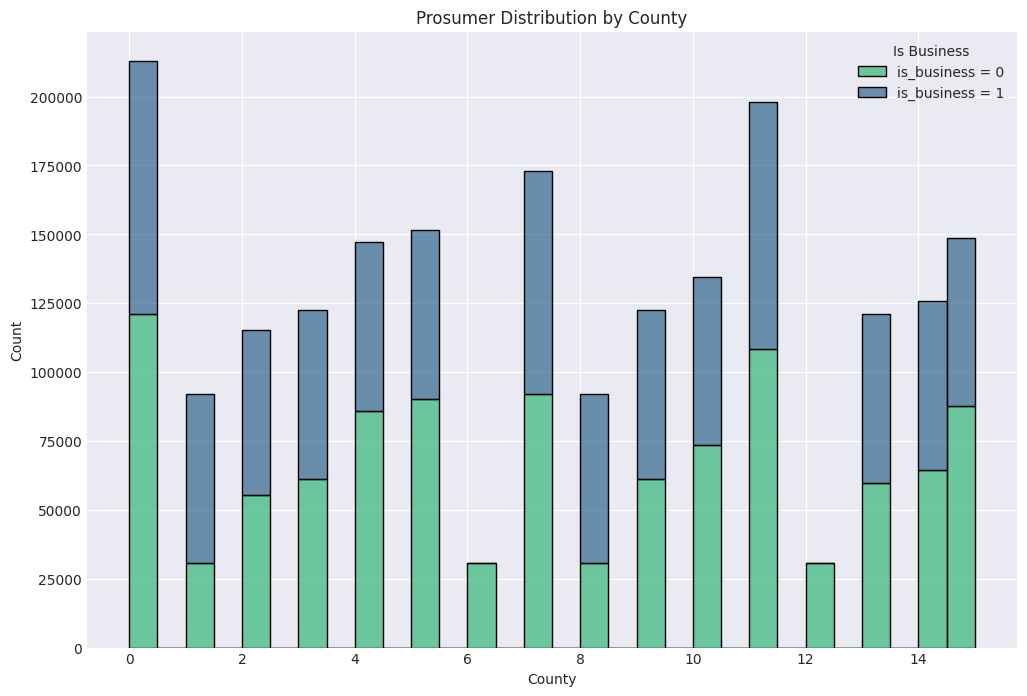

In [50]:
### 지역별 개인 및 기업의 분포 ### 

plt.figure(figsize=(12, 8))
sns.histplot(data=train, x="county", hue="is_business", multiple="stack", bins=30, palette="viridis", alpha=0.7)

plt.xlabel("County")
plt.ylabel("Count")
plt.title("Prosumer Distribution by County")

# Set custom legend labels
legend_labels = {0: 'is_business = 0', 1: 'is_business = 1'}
plt.legend(title="Is Business", labels=[legend_labels[val] for val in train['is_business'].unique()])

plt.show()

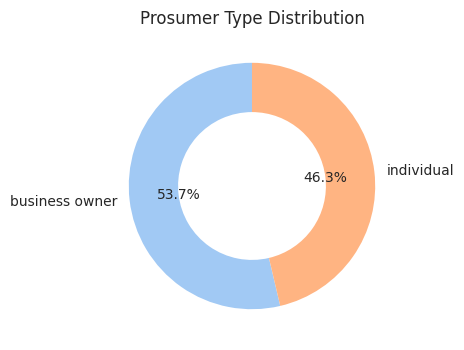

In [65]:
prosumer_type_counts = train['is_business'].value_counts()

# Map labels based on 'is_business' values
labels = ['individual' if val == 0 else 'business owner' for val in prosumer_type_counts.index]

plt.figure(figsize=(4, 4))
sns.set_palette("pastel")

# Create a pie chart
plt.pie(prosumer_type_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

plt.title('Prosumer Type Distribution')
plt.show()


### 세그먼트 0 기준으로 분리

In [72]:
seg0_trn = train_splited[train_splited["prediction_unit_id"]==0]

In [77]:
seg0_trn.head(3)

,county,is_business,product_type,data_block_id,row_id,prediction_unit_id,date,year,quarter,month,...,forecast_date_electricity,euros_per_mwh_electricity,origin_date_electricity,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,origin_date_gas,mean_price_per_mwh_gas,consumption,production
datetime,,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:00:00,0,0,1,0,0,0,2021-09-01,2021,3,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.590,0.713
2021-09-01 01:00:00,0,0,1,0,122,0,2021-09-01,2021,3,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.691,1.132
2021-09-01 02:00:00,0,0,1,0,244,0,2021-09-01,2021,3,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.594,0.490


In [75]:
# Find missing values (NaN)
seg0_trn[seg0_trn[["consumption", "production"]].isnull().any(axis=1)]

,county,is_business,product_type,data_block_id,row_id,prediction_unit_id,date,year,quarter,month,...,forecast_date_electricity,euros_per_mwh_electricity,origin_date_electricity,forecast_date_gas,lowest_price_per_mwh_gas,highest_price_per_mwh_gas,origin_date_gas,mean_price_per_mwh_gas,consumption,production
datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-31 03:00:00,0,0,1,60,178938,0,2021-10-31,2021,4,10,...,2021-10-30 03:00:00,11.97,2021-10-29 03:00:00,2021-10-30,63.00,67.98,2021-10-29,65.490,NaN,NaN
2022-03-27 03:00:00,0,0,1,207,634866,0,2022-03-27,2022,1,3,...,2022-03-26 03:00:00,4.59,2022-03-25 03:00:00,2022-03-26,83.10,87.00,2022-03-25,85.050,NaN,NaN
2022-10-30 03:00:00,0,0,1,424,1332456,0,2022-10-30,2022,4,10,...,2022-10-29 03:00:00,16.47,2022-10-28 03:00:00,2022-10-29,88.29,122.00,2022-10-28,105.145,NaN,NaN
2023-03-26 03:00:00,0,0,1,571,1806252,0,2023-03-26,2023,1,3,...,2023-03-25 03:00:00,2.06,2023-03-24 03:00:00,2023-03-25,43.66,45.00,2023-03-24,44.330,NaN,NaN


In [78]:
# Fill with previous datetime values (02:00:00)
seg0_trn["consumption"].fillna(method='ffill', inplace=True)
seg0_trn["production"].fillna(method='ffill', inplace=True)

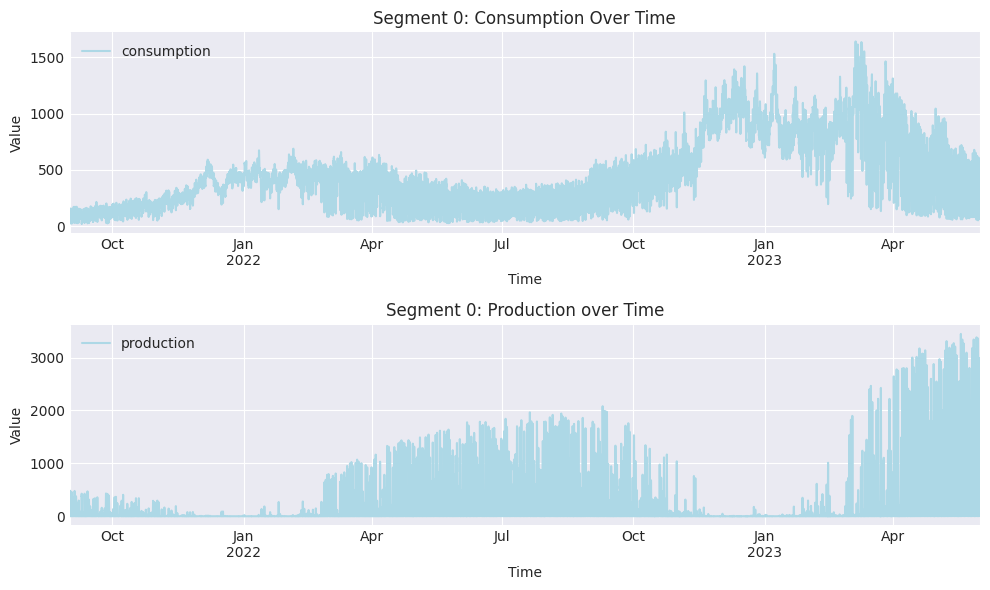

In [85]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 6))
# Plot "consumption" on the first subplot (ax1) with different colors for train and test sets
seg0_trn["consumption"].plot(ax=ax1, label="consumption", color='lightblue')  # Plot train set in blue

ax1.set_title("Segment 0: Consumption Over Time")
ax1.set_xlabel("Time")
ax1.set_ylabel("Value")
ax1.legend()  # Show legend to distinguish train and test sets

# Plot "production" on the second subplot (ax2) with different colors for train and test sets
seg0_trn["production"].plot(ax=ax2, label="production", color='lightblue')  # Plot train set in blue

ax2.set_title("Segment 0: Production over Time")
ax2.set_xlabel("Time")
ax2.set_ylabel("Value")
ax2.legend()  

plt.tight_layout()  
plt.show()